In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 10000 images belonging to 10 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
        './val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [7]:
cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()

# Fit
temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)              

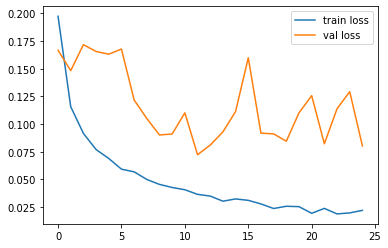

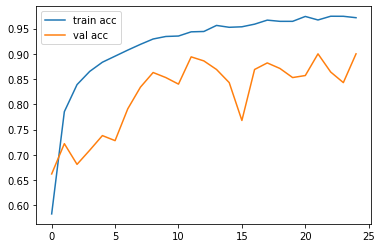

<Figure size 432x288 with 0 Axes>

In [8]:
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [46]:
from keras.preprocessing import image
test = image.load_img("./val/Tomato___Septoria_leaf_spot/00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)
print(np.argmax(result))

4


In [47]:
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
import pickle
pickle.dump(temp, open("model.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://ce52acfa-cfe1-4cca-b518-2a7ee62f8bc5/assets


In [50]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [178]:
from tensorflow.keras.models import load_model
cnn.save('model_inception.h5')

In [59]:
test_set = test_datagen.flow_from_directory('./val',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [54]:
y_pred = cnn.predict(test_set)
y_pred

array([[1.3896475e-07, 2.4862465e-11, 6.0242044e-08, ..., 1.4613897e-09,
        2.5759093e-12, 5.5152367e-13],
       [3.7394713e-07, 6.1529677e-04, 1.0342924e-03, ..., 6.5435972e-03,
        1.2296819e-06, 3.9338990e-09],
       [1.8247429e-14, 9.9995244e-01, 1.6089503e-08, ..., 5.6331550e-16,
        1.6915085e-09, 1.5096725e-10],
       ...,
       [7.4677194e-20, 2.5915217e-10, 9.4605052e-01, ..., 7.1693286e-17,
        1.1242895e-24, 1.8862922e-20],
       [7.0707564e-18, 3.2561848e-21, 6.9081493e-14, ..., 9.5771575e-18,
        9.9999821e-01, 1.0677198e-11],
       [1.0000000e+00, 2.6790029e-12, 1.3275895e-12, ..., 4.5837401e-13,
        1.8729641e-21, 6.9172513e-20]], dtype=float32)

In [165]:
model = load_model('model_inception.h5')

In [166]:
 test = image.load_img("./val/Tomato___Target_Spot/0a2de4c5-d688-4f9d-9107-ace1d281c307___Com.G_TgS_FL 7941.JPG",target_size=(150,150,3))

In [167]:
test=np.array(test)

In [168]:
test=test/255

In [169]:
test=np.expand_dims(test,axis=0)

In [172]:
result=model.predict(test)

In [173]:
 pred_name = np.argmax(result)+1

In [174]:
class_name=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [175]:
pred_name = class_name[pred_name]

In [176]:
pred_name

'Tomato___Target_Spot'